# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# OpenWeatherMap API Key
#import api_key 

# URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
# counter to count the number of calls to API
count = 1 
# counter to count the number of call sets
sets = 1 
# index for the data frame WeatherPy data frame
index = 0 
#Get current time
t0 =time.time()
# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
 
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        city_data = requests.get(f"{url}&q={city}").json() 
        city_name.append(city_data["name"])
        cloudiness.append(city_data["clouds"]["all"])
        country.append(city_data["sys"]["country"])
        date.append(city_data["dt"])
        humidity.append(city_data["main"]["humidity"])
        max_temp.append(city_data["main"]["temp_max"])
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        wind_speed.append(city_data["wind"]["speed"])
        city_namez = city_data["name"]
        print(f"Processing Record {count} of set {sets} | {city_namez}")
        #print(f"{url}&q={city}")  
        index = index +1
        # Increase counter by one
        count = count+1
        # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        if count == 51: 
            t1=time.time()
            count = 1 
            sets = sets+1
            time.sleep(60-(t1-t0))
            t0=time.time()
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
        continue
        
else:
        
    print("---------------------------------")
    print("Data Retrieval Complete"          )
    print("---------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of set 1 | Gambo
Processing Record 2 of set 1 | Rikitea
Processing Record 3 of set 1 | Arraial do Cabo
City not found. Skipping...
Processing Record 4 of set 1 | Bluff
Processing Record 5 of set 1 | Hermanus
Processing Record 6 of set 1 | Mataura
Processing Record 7 of set 1 | Kodiak
Processing Record 8 of set 1 | Carutapera
Processing Record 9 of set 1 | Bacolod
Processing Record 10 of set 1 | Mount Gambier
Processing Record 11 of set 1 | San Rafael
City not found. Skipping...
Processing Record 12 of set 1 | Hobart
Processing Record 13 of set 1 | Lisakovsk
Processing Record 14 of set 1 | Rawlins
City not found. Skipping...
Processing Record 15 of set 1 | Cape Town
Processing Record 16 of set 1 | Mar del Plata
Processing Record 17 of set 1 | New Norfolk
Processing Record 18 of set 1 | Bredasdorp
Processing Record 19 of set 1 | Iqaluit
Processing Record 20 of set 1 | Axim
City not found. Skipping...
Processing 

Processing Record 36 of set 4 | Port Augusta
Processing Record 37 of set 4 | Berlevag
Processing Record 38 of set 4 | Sovetskiy
Processing Record 39 of set 4 | Gat
Processing Record 40 of set 4 | Trincomalee
Processing Record 41 of set 4 | Leningradskiy
Processing Record 42 of set 4 | Bandarbeyla
Processing Record 43 of set 4 | Santa Cruz
City not found. Skipping...
Processing Record 44 of set 4 | Bowen
City not found. Skipping...
Processing Record 45 of set 4 | Ladario
Processing Record 46 of set 4 | Vao
Processing Record 47 of set 4 | Broome
Processing Record 48 of set 4 | Glens Falls
Processing Record 49 of set 4 | Bethel
Processing Record 50 of set 4 | Hambantota
Processing Record 1 of set 5 | Okahandja
Processing Record 2 of set 5 | Jatai
Processing Record 3 of set 5 | Achacachi
Processing Record 4 of set 5 | Ouesso
Processing Record 5 of set 5 | Lompoc
Processing Record 6 of set 5 | Durban
Processing Record 7 of set 5 | Tandil
Processing Record 8 of set 5 | Mantua
Processing Reco

Processing Record 22 of set 8 | Shetpe
Processing Record 23 of set 8 | Noumea
Processing Record 24 of set 8 | Saint-Joseph
Processing Record 25 of set 8 | Cheyenne
Processing Record 26 of set 8 | Abalak
Processing Record 27 of set 8 | Chapais
Processing Record 28 of set 8 | Monastyrshchina
Processing Record 29 of set 8 | Natchitoches
Processing Record 30 of set 8 | Burkburnett
City not found. Skipping...
Processing Record 31 of set 8 | Sendai
Processing Record 32 of set 8 | Falmouth
Processing Record 33 of set 8 | Viedma
City not found. Skipping...
Processing Record 34 of set 8 | Yumen
Processing Record 35 of set 8 | Iranduba
Processing Record 36 of set 8 | Khatanga
Processing Record 37 of set 8 | Santa Cruz Cabralia
Processing Record 38 of set 8 | Alegrete
Processing Record 39 of set 8 | Sohag
Processing Record 40 of set 8 | Roberval
City not found. Skipping...
Processing Record 41 of set 8 | Auckland
Processing Record 42 of set 8 | Colac
City not found. Skipping...
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictonary 
weather_data = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}



# Convert dictionar to Pandas DataFrame
weather_df = pd.DataFrame(weather_data)


# Display count of weather data values 
weather_df.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [9]:
# Export the City_Data into a csv
weather_df.to_csv(output_data_file, index_label="City_Id")

# Display data frame head 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gambo,30,NG,1560102957,29,11.96,9.63,97.00,9.66
1,Rikitea,81,PF,1560102957,76,-23.12,-134.97,72.88,14.29
2,Arraial do Cabo,20,BR,1560102957,73,-22.97,-42.02,77.00,9.17
3,Bluff,0,AU,1560102957,94,-23.58,149.07,59.38,6.38
4,Hermanus,0,ZA,1560102957,76,-34.42,19.24,64.00,7.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

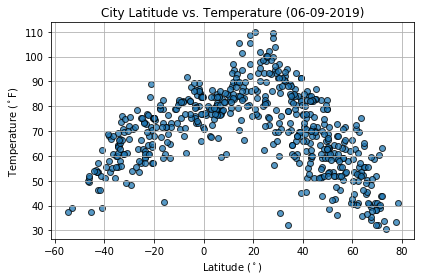

In [12]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("temp.png")
plt.show()

#### Latitude vs. Humidity Plot

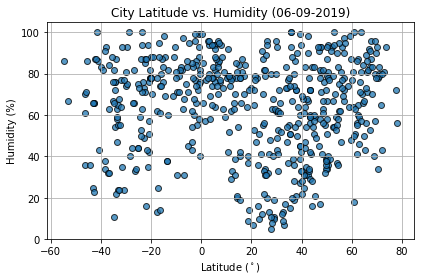

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

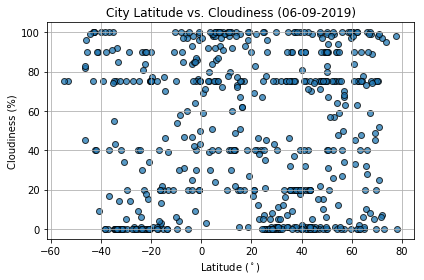

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("clouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

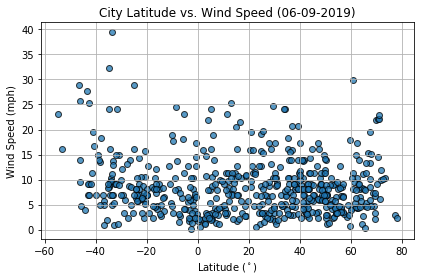

In [15]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("wind.png")
plt.show()